In [10]:
import sys
sys.path.append('Tree')

import dendropy as dy
import graphviz
from tree_base import PruneTree
from mutation_tree import MutationTree
from cell_tree import CellTree
from Bio import Phylo
from io import StringIO
import numpy as np

In [ ]:
tree = dy.Tree.get(path="/home/max/Master_Thesis/Data/test_0__n5_m5_fn0.200_fp1.000e-02.newick", schema="newick")

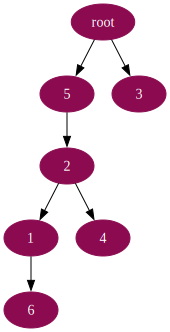

In [2]:
graphviz.Source.from_file("/home/max/Master_Thesis/Data/test_0__n5_m5_fn0.200_fp1.000e-02.gv")

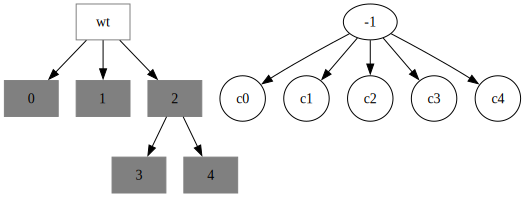

In [3]:
one = MutationTree(5,5)
one.to_graphviz("one.png")

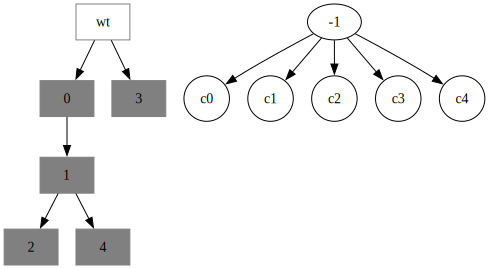

In [39]:
two = MutationTree(5,5)
two.use_parent_vec([5,0,1,5,1,-1], 5)
two.to_graphviz("two.png")

In [11]:
tree = Phylo.read(StringIO("6(3,5(2(1,4)));"), "newick")

for node in tree.find_clades():
    if node.confidence is not None and node.name is None:  # If it has a confidence value but no name
        node.name = str(int(node.confidence))

node_list = list(tree.find_clades(order="level"))
node_to_index = {node: int(node.name) - 1 for node in node_list}
    
# Initialize parent vector with -1 (default for roots)
parent_vector = [-1] * len(node_to_index)
for node in node_list:
    for child in node.clades:
        parent_vector[node_to_index[child]] = node_to_index[node]  

parent_vector

[1, 4, 5, 1, 5, -1]

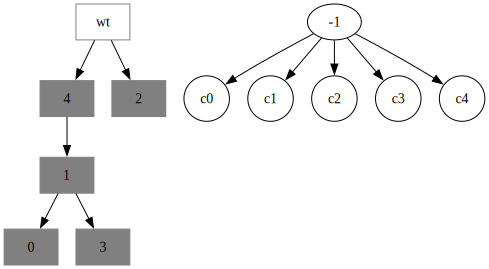

In [12]:
three = MutationTree(5,5)
three.use_parent_vec(parent_vector, 5)
three.to_graphviz("three.png")

In [4]:
three.all_spr()

[[0, 2],
 [0, 3],
 [0, 4],
 [1, 2],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [3, 0],
 [3, 2],
 [3, 4],
 [4, 2]]

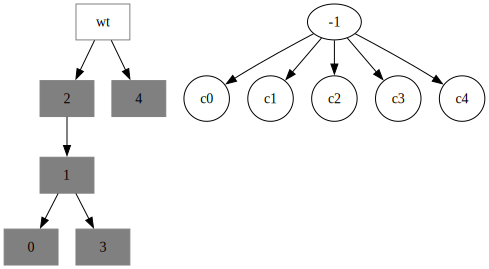

In [13]:
three.perf_rand_spr()
three.to_graphviz("three.png")

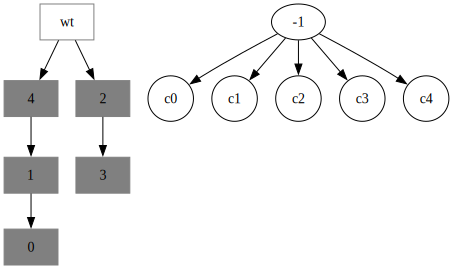

In [4]:
three.perf_spr(3,2)
three.to_graphviz("three.png")

In [15]:
dfs = three.dfs(1)
dfs.to_graphviz("dfs.png")

AttributeError: 'generator' object has no attribute 'to_graphviz'

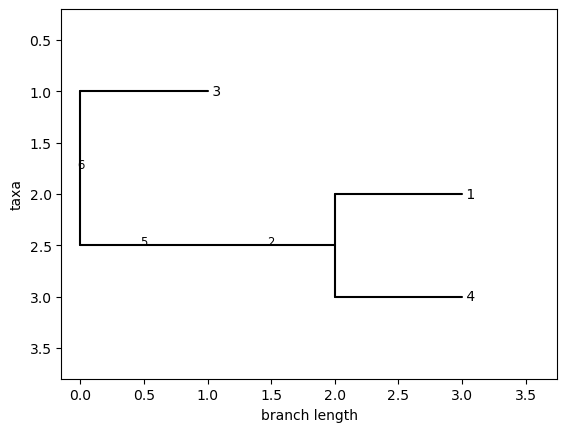

In [6]:
tree = Phylo.read(StringIO("6(3,5(2(1,4)));"), "newick")
Phylo.draw(tree)

In [6]:
file = open("/home/max/Master_Thesis/Data/test_0__n5_m5_fn0.200_fp1.000e-02_1doublets.noisy", "r")
input = file.read()
rows = input.split('\n')
rows = rows[0:len(rows)-1]
matrix = [row.split(' ') for row in rows]
matrix = np.array(matrix, dtype=int)


In [7]:
matrix

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0]])

In [15]:
A_T = np.zeros((three.n_mut, three.n_mut + 1))

for i in range(three.n_mut):
    for j in range(three.n_mut):
        if ((i == j) or three.isdescendant(j, i)): A_T[i,j] = 1           
A_T

array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1., 0.]])

In [25]:
sig = np.array([0, 1, 0, 5, 2])

In [26]:
p = [0.99, 0.2, 0.01, 0.8]

lh = 1

n = np.shape(matrix)[0]
m = np.shape(matrix)[1]

for i in range(n):
    for j in range(m):
        p_idx = (matrix[i,j] * 2) + (A_T[i, sig[j]])
        lh *= p[int(p_idx)]

lh 

0.11428072752429828

In [31]:
sig = np.zeros(m, dtype=int)

for j in range(m):
    lh = np.ones(n+1)
    for k in range(n+1):
        for i in range(n):
            p_idx = (matrix[i,j] * 2) + (A_T[i, k])
            lh[k] *= p[int(p_idx)]
    sig[j] = np.argmax(lh)

sig

array([0, 1, 0, 5, 2])

In [26]:
three.conditional_lh(matrix, 0.01, 0.2)

0.00011048625024321805

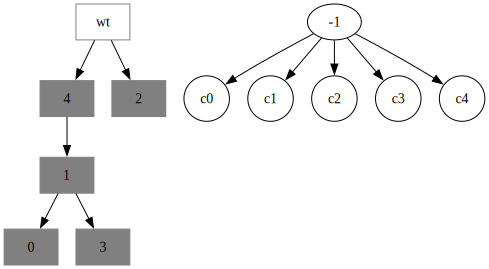

In [9]:
three.to_graphviz("three.png")

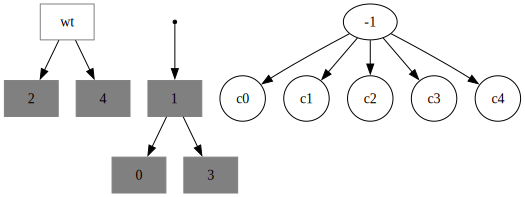

In [24]:
three.prune(1)
three.to_graphviz("three.png")

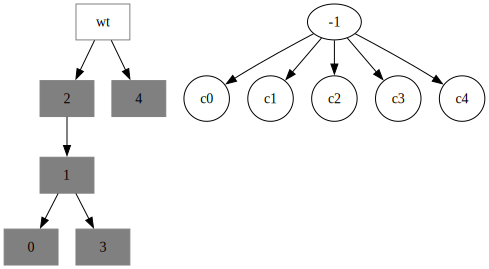

In [25]:
three.assign_parent(1,2)
three.to_graphviz("three.png")